## Analysis of Medical History Form in MrOS V1 Data (EDA3-V1-MH.ipynb)
**Form Example**: [Medical History](mh_form.pdf).

The Medical History form within the MrOS dataset conatins import data related to a patient's current and previous medical information.  There are 11 primary questions which can have multiple chained answers:
 1. Previous and current medical diagnosis (diabetes, cardiovascular issues, osteoporosis, etc.)
 1. Surgical procedure on stomach or intestines
 1. Arthritis or Gout history
 1. Kidney Stone history
 1. Cancer history
 1. Trouble with Diziness
 1. Falls
 1. Weight at birth
 1. Height at 25 years old
 1. Weight at 25 years old
 1. Heaviest weight and age at that time 
 
#### 1. [Installation and Importing of Libraries](#eda_import)
#### 2. [Retreival of Data](#eda_retrieval)
#### 3. [Data Cleanup](#eda_cleanup)
#### 4. [Handling of NAs](#eda_na)
#### 5. [Descriptive Statistics and Visualizations](#eda_describe)
#### 6. [Write a CSV of cleaned data](#eda_csv)

### <a name="eda_import"></a>Installation and Importing of Libraries
In order to both explore and visualize the data, it's necessary for us to load various libraries.  In addition to loading already pre-installed libraries, we've also had to install seaborn for plotting. 

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.12.2)


In [2]:
##import libraries required for analysis
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
import psycopg2
import sqlalchemy
import getpass
import pandas as pd 

### <a name="eda_retrieval"></a>Retreival of Data
The data needs to be retrieved from the Postgres database and stored in a dataframe for us to begin analyzing.


In [3]:

user = "dtfp3"
host = "pgsql.dsa.lan"
database = "casestdysu23t03"
password = getpass.getpass()
connectionstring = "postgresql://" + user + ":" + password + "@" + host + "/" + database
engine = sqlalchemy.create_engine(connectionstring)
connection = None

try:
    connection = engine.connect()
except Exception as err:
    print("An error has occurred trying to connect: {}".format(err))

del password

········


In [4]:
query = "SELECT * FROM public.v1_form_mh"
mh = pd.read_sql_query(query, con=connection)

### <a name="eda_cleanup"></a>Data Cleanup
Now that the data has been retrieved from the database, let's do some exploration and cleanup. 

We'll need to first understand the dimensions of our data and then it'll be helpful to make it more readable. 

In [5]:
mh = mh.drop(['MH'], axis=1)
mh_with_nulls = mh

In [6]:
print(mh['ID'].dtype)
print(mh.head())

object
       ID  MHDIAB  MHDIABT  MHHTHY  MHHTHYT  MHLTHY  MHLTHYT  MHOSTEO  \
0  BI0001     0.0      NaN     0.0      NaN     0.0      NaN      0.0   
1  BI0002     0.0      NaN     0.0      NaN     0.0      NaN      0.0   
2  BI0003     0.0      NaN     0.0      NaN     0.0      NaN      0.0   
3  BI0004     0.0      NaN     0.0      NaN     0.0      NaN      0.0   
4  BI0005     0.0      NaN     0.0      NaN     0.0      NaN      0.0   

   MHOSTEOT  MHSTRK  ...  MHNOINJR  MHBW  MHWEIGHT  MHWGTAGE  MHHGTCM  \
0       NaN     0.0  ...       NaN   4.0     170.0      55.0   172.72   
1       NaN     0.0  ...       NaN   NaN     175.0      64.0   182.88   
2       NaN     0.0  ...       NaN   3.0     175.0      31.0   182.88   
3       NaN     0.0  ...       NaN   NaN     135.0      62.0   187.96   
4       NaN     0.0  ...       0.0   4.0     145.0      70.0   149.86   

   MHWGTKG  MHWGTMKG  MHHIPOA  MHKNEEOA  MHHANDOA  
0  77.1103   92.9859      NaN       NaN       NaN  
1  79.3783 

In [7]:
# Iterating over the column names so we can then make human readable versions
for column in mh.columns:
    print(column)

ID
MHDIAB
MHDIABT
MHHTHY
MHHTHYT
MHLTHY
MHLTHYT
MHOSTEO
MHOSTEOT
MHSTRK
MHSTRKT
MHPARK
MHPARKT
MHBP
MHBPT
MHMI
MHMIT
MHANGIN
MHANGINT
MHCHF
MHCHFT
MHCOPD
MHCOPDT
MHPROST
MHPROSTT
MHGLAU
MHGLAUT
MHCAT
MHSTOM
MHSTMAGE
MHARTH
MHRHEUM
MHOSTART
MHGOUT
MHARTOTH
MHARTDK
MHHIP
MHKNEE
MHHAND
MHWRIST
MHBACK
MHNECK
MHSHOULD
MHELBOW
MHANKLE
MHFOOT
MHJNTOTH
MHARTHMD
MHKDNY
MHKDNYAK
MHKDNYTR
MHCANCER
MHCC
MHCCAGE
MHSC
MHSCAGE
MHLC
MHLCAGE
MHPC
MHPCAGE
MHPCRAD
MHPCSGPS
MHPCSGTS
MHPCHOR
MHPCNTX
MHPCOTH
MHOC
MHOCAGE
MHDIZZY
MHDIZTIM
MHDZFNT
MHDZSPIN
MHDZBAL
MHDZOTH
MHDIZLMT
MHFALL
MHFALLTM
MHFRACT
MHHEAD
MHSPRAIN
MHBRUISE
MHOTHER
MHNOINJR
MHBW
MHWEIGHT
MHWGTAGE
MHHGTCM
MHWGTKG
MHWGTMKG
MHHIPOA
MHKNEEOA
MHHANDOA


In [8]:
# Create a dictionary mapping short hand names to full names
# I'm not going to use this for now 
# name_mapping = {
#     #'ID': 'ID_Participant ID',
#     'MHDIAB': 'MHDIAB_Diabetes',
#     'MHDIABT': 'MHDIABT_Diabetes Type',
#     'MHHTHY': 'MHHTHY_Hypertension',
#     'MHHTHYT': 'MHHTHYT_Hypertension Type',
#     'MHLTHY': 'MHLTHY_Hyperthyroidism',
#     'MHLTHYT': 'MHLTHYT_Hyperthyroidism Type',
#     'MHOSTEO': 'MHOSTEO_Osteoporosis',
#     'MHOSTEOT': 'MHOSTEOT_Osteoporosis Type',
#     'MHSTRK': 'MHSTRK_Stroke',
#     'MHSTRKT': 'MHSTRKT_Stroke Type',
#     'MHPARK': 'MHPARK_Parkinson\'s Disease',
#     'MHPARKT': 'MHPARKT_Parkinson\'s Disease Type',
#     'MHBP': 'MHBP_High Blood Pressure',
#     'MHBPT': 'MHBPT_High Blood Pressure Type',
#     'MHMI': 'MHMI_Myocardial Infarction',
#     'MHMIT': 'MHMIT_Myocardial Infarction Type',
#     'MHANGIN': 'MHANGIN_Angina',
#     'MHANGINT': 'MHANGINT_Angina Type',
#     'MHCHF': 'MHCHF_Congestive Heart Failure',
#     'MHCHFT': 'MHCHFT_Congestive Heart Failure Type',
#     'MHCOPD': 'MHCOPD_Chronic Obstructive Pulmonary Disease (COPD)',
#     'MHCOPDT': 'MHCOPDT_COPD Type',
#     'MHPROST': 'MHPROST_Prostate Problems',
#     'MHPROSTT': 'MHPROSTT_Prostate Problems Type',
#     'MHGLAU': 'MHGLAU_Glaucoma',
#     'MHGLAUT': 'MHGLAUT_Glaucoma Type',
#     'MHCAT': 'MHCAT_Cataracts',
#     'MHSTOM': 'MHSTOM_Stomach Problems',
#     'MHSTMAGE': 'MHSTMAGE_Stomach Problems Age',
#     'MHARTH': 'MHARTH_Arthritis',
#     'MHRHEUM': 'MHRHEUM_Rheumatism',
#     'MHOSTART': 'MHOSTART_Arthritis/Rheumatism Start',
#     'MHGOUT': 'MHGOUT_Gout',
#     'MHARTOTH': 'MHARTOTH_Other Heart Conditions',
#     'MHARTDK': 'MHARTDK_Other Heart Conditions Details',
#     'MHHIP': 'MHHIP_Hip Problems',
#     'MHKNEE': 'MHKNEE_Knee Problems',
#     'MHHAND': 'MHHAND_Hand Problems',
#     'MHWRIST': 'MHWRIST_Wrist Problems',
#     'MHBACK': 'MHBACK_Back Problems',
#     'MHNECK': 'MHNECK_Neck Problems',
#     'MHSHOULD': 'MHSHOULD_Shoulder Problems',
#     'MHELBOW': 'MHELBOW_Elbow Problems',
#     'MHANKLE': 'MHANKLE_Ankle Problems',
#     'MHFOOT': 'MHFOOT_Foot Problems',
#     'MHJNTOTH': 'MHJNTOTH_Other Joint Conditions',
#     'MHARTHMD': 'MHARTHMD_Arthritis Medication',
#     'MHKDNY': 'MHKDNY_Kidney Problems',
#     'MHKDNYAK': 'MHKDNYAK_Kidney Problems Age at Start',
#     'MHKDNYTR': 'MHKDNYTR_Kidney Problems Treatment',
#     'MHCANCER': 'MHCANCER_Cancer',
#     'MHCC': 'MHCC_Colon Cancer',
#     'MHCCAGE': 'MHCCAGE_Colon Cancer Age',
#     'MHSC': 'MHSC_Skin Cancer',
#     'MHSCAGE': 'MHSCAGE_Skin Cancer Age',
#     'MHLC': 'MHLC_Lung Cancer',
#     'MHLCAGE': 'MHLCAGE_Lung Cancer Age',
#     'MHPC': 'MHPC_Prostate Cancer',
#     'MHPCAGE': 'MHPCAGE_Prostate Cancer Age',
#     'MHPCRAD': 'MHPCRAD_Prostate Cancer Radiation',
#     'MHPCSGPS': 'MHPCSGPS_Prostate Cancer Surgery',
#     'MHPCSGTS': 'MHPCSGTS_Prostate Cancer Surgical Treatment',
#     'MHPCHOR': 'MHPCHOR_Prostate Cancer Hormone Treatment',
#     'MHPCNTX': 'MHPCNTX_Prostate Cancer Non-Treatment',
#     'MHPCOTH': 'MHPCOTH_Prostate Cancer Other Treatment',
#     'MHOC': 'MHOC_Other Cancer',
#     'MHOCAGE': 'MHOCAGE_Other Cancer Age',
#     'MHDIZZY': 'MHDIZZY_Dizziness',
#     'MHDIZTIM': 'MHDIZTIM_Dizziness Time',
#     'MHDZFNT': 'MHDZFNT_Dizziness Frequency',
#     'MHDZSPIN': 'MHDZSPIN_Dizziness Spinning',
#     'MHDZBAL': 'MHDZBAL_Dizziness Balance',
#     'MHDZOTH': 'MHDZOTH_Dizziness Other',
#     'MHDIZLMT': 'MHDIZLMT_Dizziness Limitations',
#     'MHFALL': 'MHFALL_Falls',
#     'MHFALLTM': 'MHFALLTM_Falls Time',
#     'MHFRACT': 'MHFRACT_Fractures',
#     'MHHEAD': 'MHHEAD_Head Injury',
#     'MHSPRAIN': 'MHSPRAIN_Sprains',
#     'MHBRUISE': 'MHBRUISE_Bruises',
#     'MHOTHER': 'MHOTHER_Other Health Conditions',
#     'MHNOINJR': 'MHNOINJR_No Injury',
#     'MHBW': 'MHBW_Birth Weight',
#     'MHWEIGHT': 'MHWEIGHT_Weight',
#     'MHWGTAGE': 'MHWGTAGE_Weight Change Age',
#     'MHHGTCM': 'MHHGTCM_Height in cm',
#     'MHWGTKG': 'MHWGTKG_Weight in kg',
#     'MHWGTMKG': 'MHWGTMKG_Weight in kg (Measurement kg)',
#     'MHHIPOA': 'MHHIPOA_Hip OA',
#     'MHKNEEOA': 'MHKNEEOA_Knee OA',
#     'MHHANDOA': 'MHHANDOA_Hand OA',
#     }

# # Rename columns
# mh.rename(columns=name_mapping, inplace=True)

In [9]:
mh

,ID,MHDIAB,MHDIABT,MHHTHY,MHHTHYT,MHLTHY,MHLTHYT,MHOSTEO,MHOSTEOT,MHSTRK,...,MHNOINJR,MHBW,MHWEIGHT,MHWGTAGE,MHHGTCM,MHWGTKG,MHWGTMKG,MHHIPOA,MHKNEEOA,MHHANDOA
0,BI0001,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,4.0,170.0,55.0,172.72,77.1103,92.9859,NaN,NaN,NaN
1,BI0002,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,175.0,64.0,182.88,79.3783,106.5940,0.0,0.0,0.0
2,BI0003,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,3.0,175.0,31.0,182.88,79.3783,85.7285,NaN,NaN,NaN
3,BI0004,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,135.0,62.0,187.96,61.2346,107.9540,NaN,NaN,NaN
4,BI0005,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,4.0,145.0,70.0,149.86,65.7706,88.4501,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,SD9014,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,110.0,52.0,167.64,49.8949,63.5026,NaN,NaN,NaN
5990,SD9015,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,4.0,175.0,61.0,170.18,79.3783,87.9965,NaN,NaN,NaN
5991,SD9016,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,3.0,140.0,60.0,167.64,63.5026,72.5744,NaN,NaN,NaN
5992,SD9017,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,5.0,134.0,69.0,182.88,60.7811,95.7075,0.0,0.0,1.0


### <a name="eda_na"></a>Exploration of NA Values
Now, we need to understand how much incomplete data we have. 

As we're aware, many of the questions are chained based off an initial yes response.  Here's a breakdown of how the chaining is done within this form:
  - **Previous Medical Diagnosis**
    - Diabetes Type (MHDIABT)
    - Hypertension Type (MHHTHYT)
    - Hyperthyroidism Type (MHLTHYT)
    - Osteoporosis Type (MHOSTEOT)
    - Stroke Type (MHSTRKT)
    - Parkinson's Disease Type (MHPARKT)
    - High Blood Pressure Type (MHBPT)
    - Myocardial Infarction Type (MHMIT)
    - Angina Type (MHANGINT)
    - Congestive Heart Failure Type (MHCHFT)
    - COPD Type (MHCOPDT)
    - Prostate Problems Type (MHPROSTT)
    - Stomach Problems Age (MHSTMAGE)
    - Glaucoma Type (MHGLAUT)
  - **Surgical procedure on stomach or intestines**
    - Stomach Problems Age (MHSTMAGE)
  - **Arthritis or Gout history**
    - Rheumatism (MHRHEUM)
    - Arthritis/Rheumatism Start (MHOSTART)
    - Gout (MHGOUT)
    - Other Heart Conditions (MHARTOTH)
    - Other Heart Conditions Details (MHARTDK)
    - Hip Problems (MHHIP)
    - Knee Problems (MHKNEE)
    - Hand Problems (MHHAND)
    - Wrist Problems (MHWRIST)
    - Back Problems (MHBACK)
    - Neck Problems (MHNECK)
    - Shoulder Problems (MHSHOULD)
    - Elbow Problems (MHELBOW)
    - Ankle Problems (MHANKLE)
    - Foot Problems (MHFOOT)
    - Other Joint Conditions (MHJNTOTH)
    - Arthritis Medication (MHARTHMD)
    - Hip OA (MHHIPOA)
    - Knee OA (MHKNEEOA)
    - Hand OA (MHHANDOA)
  - **Kidney Stone history**
    - Kidney Problems Age at Start (MHKDNYAK)
    - Kidney Problems Treatment (MHKDNYTR)
  - **Cancer history**
    - Colon Cancer (MHCC)
    - Colon Cancer Age (MHCCAGE)
    - Skin Cancer (MHSC)
    - Skin Cancer Age (MHSCAGE)
    - Lung Cancer (MHLC)
    - Lung Cancer Age (MHLCAGE)
    - Prostate Cancer (MHPC)
    - Prostate Cancer Age (MHPCAGE)
    - Prostate Cancer Radiation (MHPCRAD)
    - Prostate Cancer Surgery (MHPCSGPS)
    - Prostate Cancer Surgical Treatment (MHPCSGTS)
    - Prostate Cancer Hormone Treatment (MHPCHOR)
    - Prostate Cancer Non-Treatment (MHPCNTX)
    - Prostate Cancer Other Treatment (MHPCOTH)
    - Other Cancer (MHOC)
    - Other Cancer Age (MHOCAGE)
  - **Trouble with Diziness**
    - Dizziness Time (MHDIZTIM)
    - Dizziness Frequency (MHDZFNT)
    - Dizziness Spinning (MHDZSPIN)
    - Dizziness Balance (MHDZBAL)
    - Dizziness Other (MHDZOTH)
    - Dizziness Limitations (MHDIZLMT)
  - **Falls**
    - Falls Time (MHFALLTM)
    - Fractures (MHFRACT)
    - Head Injury (MHHEAD)
    - Sprains (MHSPRAIN)
    - Bruises (MHBRUISE)
    - Other Health Conditions (MHOTHER)
    - No Injury (MHNOINJR)

In [10]:
pd.set_option('display.max_rows', None)
print(pd.DataFrame(mh.isna().sum(), columns=['Missing Values']))
pd.reset_option('display.max_rows')

          Missing Values
ID                     0
MHDIAB                 0
MHDIABT             5341
MHHTHY                 0
MHHTHYT             5897
MHLTHY                 0
MHLTHYT             5575
MHOSTEO                0
MHOSTEOT            5782
MHSTRK                 0
MHSTRKT             5650
MHPARK                 0
MHPARKT             5942
MHBP                   0
MHBPT               3413
MHMI                   0
MHMIT               5160
MHANGIN                0
MHANGINT            5138
MHCHF                  0
MHCHFT              5677
MHCOPD                 0
MHCOPDT             5354
MHPROST                0
MHPROSTT            4496
MHGLAU                 0
MHGLAUT             5447
MHCAT                  0
MHSTOM                 0
MHSTMAGE            5549
MHARTH                 0
MHRHEUM             3147
MHOSTART            3147
MHGOUT              3147
MHARTOTH            3147
MHARTDK             3147
MHHIP               3147
MHKNEE              3147
MHHAND              3147


In [11]:
# replace missing values in the specified columns with 0
cols_to_zero = ['MHDIABT','MHHTHYT','MHLTHYT','MHOSTEOT','MHSTRKT','MHPARKT','MHBPT','MHMIT','MHANGINT','MHCHFT','MHCOPDT',
            'MHPROSTT','MHSTMAGE','MHGLAUT','MHSTMAGE','MHRHEUM','MHOSTART','MHGOUT','MHARTOTH','MHARTDK','MHHIP',
            'MHKNEE','MHHAND','MHWRIST','MHBACK','MHNECK','MHSHOULD','MHELBOW','MHANKLE','MHFOOT','MHJNTOTH','MHARTHMD',
            'MHHIPOA','MHKNEEOA','MHHANDOA','MHKDNYAK','MHKDNYTR','MHCC','MHCCAGE','MHSC','MHSCAGE','MHLC','MHLCAGE',
            'MHPC','MHPCAGE','MHPCRAD','MHPCSGPS','MHPCSGTS','MHPCHOR','MHPCNTX','MHPCOTH','MHOC','MHOCAGE','MHDIZTIM',
            'MHDZFNT','MHDZSPIN','MHDZBAL','MHDZOTH','MHDIZLMT','MHFALLTM','MHFRACT','MHHEAD','MHSPRAIN','MHBRUISE','MHOTHER',
            'MHNOINJR']

mh[cols_to_zero] = mh[cols_to_zero].fillna(0)

# MHBW will have nulls but that's because participants may have not known their birth weight. 
# For modeling purposes, we will replace it with 0 also 
mh['MHBW'] = mh['MHBW'].fillna(0)

# fill with mode
cols_to_mode = ['MHWEIGHT','MHWGTAGE','MHHGTCM','MHWGTKG']

for column in cols_to_mode:
    mh[column].fillna(mh[column].mode()[0], inplace=True)

In [12]:
mh.describe().T

,count,mean,std,min,25%,50%,75%,max
MHDIAB,5994.0,0.108942,0.311593,0.0000,0.0000,0.0000,0.0000,1.000
MHDIABT,5994.0,0.093093,0.290587,0.0000,0.0000,0.0000,0.0000,1.000
MHHTHY,5994.0,0.016183,0.126189,0.0000,0.0000,0.0000,0.0000,1.000
MHHTHYT,5994.0,0.009009,0.094495,0.0000,0.0000,0.0000,0.0000,1.000
MHLTHY,5994.0,0.069903,0.255005,0.0000,0.0000,0.0000,0.0000,1.000
...,...,...,...,...,...,...,...,...
MHWGTKG,5994.0,72.809819,10.517126,36.2872,65.7706,72.5744,79.3783,151.953
MHWGTMKG,5994.0,88.957307,14.036719,52.1628,79.3783,86.1821,97.5219,175.539
MHHIPOA,5994.0,0.052386,0.222822,0.0000,0.0000,0.0000,0.0000,1.000
MHKNEEOA,5994.0,0.098265,0.297697,0.0000,0.0000,0.0000,0.0000,1.000


<a name="eda_describe"></a><h3> Descriptive Statistics and Visualizations </h3>
Below are a set of descriptive statistics meant to familiarize the audience

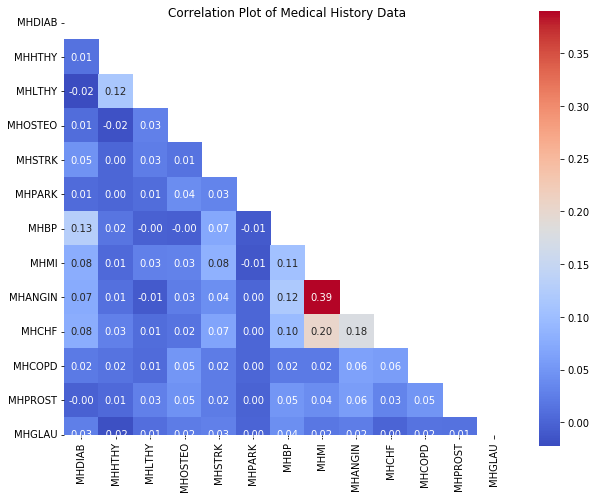

In [13]:
# We'll focus specifically on the medical conditions and whether there's a correlation between them
selected_columns = ['MHDIAB', 'MHHTHY', 'MHLTHY', 'MHOSTEO', 'MHSTRK', 'MHPARK', 'MHBP', 'MHMI', 'MHANGIN', 'MHCHF', 'MHCOPD', 'MHPROST', 'MHGLAU']
selected_data = mh[selected_columns]

# Calculate the correlation matrix and create the plot 
correlation_matrix = selected_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, mask=mask)
plt.title('Correlation Plot of Medical History Data')

# Display the plot
plt.show()

It looks like there's minimal correlation between most medical conditions.  However, we do see that there are some stronger correlations between the below which is expected due to their relation to coronary artery disease.  Additionally, Myocardial Infraction can cause damage to the heart muscle which could lead to Congestive Heart Failure.  
 - Myocardial Infarction (MHMI) and Angina (MHANGIN)
 - Myocardial Infarction (MHMI) and Congestive Heart Failure (MHCHF)
 - Congestive Heart Failure (MHCHF) and Angina (MHANGIN)

There's another grouping of stronger relationships, however, these all have similar cardiovasculary relationships which means this is expected. 
 - High Blood Pressure (MHBP) and Angina (MHANGIN)
 - Myocardial Infarction (MHMI) and High Blood Pressure (MHBP)
 - Congestive Heart Failure (MHCHF) and High Blood Pressure (MHBP)
 
Finally, we also see the below which isn't suprising since hyperthyroidism can lead to to increased sympathetic nervous system activity, which can contribute to hypertension.
 - Hyperthyroidism (MLTHY) and Hypertension (MHHTHY)

In [14]:
columns_of_interest = ['MHDIAB', 'MHHTHY', 'MHLTHY', 'MHOSTEO', 'MHSTRK', 'MHPARK', 'MHBP', 'MHMI', 'MHANGIN', 'MHCHF', 'MHCOPD', 'MHPROST', 'MHGLAU', 'MHFRACT', 'MHDIZZY', 'MHARTH', 'MHHIP', 'MHNECK', 'MHBACK', 'MHFOOT']
fracture_exploration = mh[columns_of_interest]

correlation_matrix = fracture_exploration.corr()
fracture_corr = correlation_matrix['MHFRACT'].sort_values(ascending=False)
print(fracture_corr)

MHFRACT    1.000000
MHOSTEO    0.082147
MHFOOT     0.069429
MHSTRK     0.041718
MHPROST    0.034967
MHARTH     0.032805
MHNECK     0.032079
MHBACK     0.029009
MHDIZZY    0.024914
MHCHF      0.022438
MHBP       0.018070
MHHIP      0.017050
MHCOPD     0.006544
MHHTHY     0.004317
MHPARK     0.002125
MHMI       0.001385
MHGLAU     0.000259
MHANGIN   -0.003742
MHLTHY    -0.009547
MHDIAB    -0.015523
Name: MHFRACT, dtype: float64


We do see that there's possibly some correlation between osteoporosis and fall fractures that could be further investigated.

### <a name="eda_csv"></a>Write CSV

In [15]:
# Define the file path and name
file_path_without_nulls = "/dsa/groups/casestudy2023su/team03/model_data/MH_results.csv"
file_path_with_nulls = "/dsa/groups/casestudy2023su/team03/model_data/null_included/MH_results_with_nulls.csv"

# Export the DataFrame to CSV
mh.to_csv(file_path_without_nulls, index=False)
mh_with_nulls.to_csv(file_path_with_nulls, index=False)

# Set file permissions to 777
os.chmod(file_path_without_nulls, 0o777)
os.chmod(file_path_with_nulls, 0o777)

print("DataFrame exported to CSVs with 777 permissions successfully!")

DataFrame exported to CSVs with 777 permissions successfully!
